# Project 1 - Stress on a floating wind turbine

# Floating wind turbines
Currently, the demand for renewable energy is very high. Wind turbines are very successful sources of renewable energy, and many states are planning new wind farms to increase the fraction of green energy in the overall consumption. Despite the high demand, it is difficult to establish large new onshore (land-based) wind farms due to space limitations: Attention has to be paid to landscape and neighbors.

The same constraints do not limit offshore wind farms. However, the conventional offshore wind turbine has a foundation which stands on the seafloor. The foundations are limited to a certain height, as the price and complexity of the foundation scales with the water depth. According to Wikipedia, fixed foundations can be installed at sea depth up to around 50 m.

This limits the possible wind farm locations to very few areas in the world where the ocean floor falls off relatively flatly away from the shore. 

Therefore, floating foundations are now being developed by many companies.

While floating wind turbine foundations may solve many problems related to installation of offshore wind, the technologies are still being tested. 

In this project I will work with simulated data measured for a floating foundation with a with a 15 MW wind turbine. For comparison, the standard offshore wind turbine is certified for on the order of 8 MW. Wind turbines in producing in the range of 15-20 MW are being pursued by many of the manufacturing companies. 


### This project
In this project, we will consider data from simulations of a floating 15 MW offshore turbine in operation.


## Necessary Python packages

In [40]:
# We need some modules (Python libraries) in the following.
# Usually, such modules are loaded in the first cell of a notebook.
# The modules that we need concern loading the data and plotting
# them later.

# all plots should appear directly within the notebook
%matplotlib inline

# modules necessary for plotting
import matplotlib.pyplot as plt

# seaborn just makes plots look a bit nicer - not
# absolutely necessary though.
import seaborn as sns
sns.set_style("whitegrid")

# modules to load the data. The Pandas module
# is just needed for a quick data-loading demonstration at the
# start of the Notebook. 
import pandas as pd


# module to make avilable data structures and routines
# for numerics
import numpy as np


# Loading the data
One great feature of `Python` is the ability to load all kinds of standardised data-formats into memory - in most cases with a single command. The data can be located on your disk or on the Web. 

You need to download the file "Orcaflex Simulation of 15 MW floating offshore wind turbine.csv" from the github. 

In [41]:
filename = "C:\\Users\\Berk\\Desktop\\course_materials\\python_course_2024-05-06\\scientific-programming-with-python-summer-2024\\lecture_04\\data\\Orcaflex_Simulation_15_MW_wind_turbine.csv"

data = pd.read_csv(filename, # Here we load the file
                   delimiter=';') # Delimiter tells how the rows are separated
data # print a preview of the data

,Orcaflex Simulation of 15 MW floating offshore wind turbine,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Time,Wind speed,Sea surface,Mooring force,Tilt,Nac. acc.,Tower mom.
2,(s),(m/s),(m),(kN),(deg.),(m/s2),(kNm)
3,0,32.98,0.47,7436.27,-5.56,-1.25,-806154.06
4,0.1,33.24,0.29,7457.32,-5.55,-1.25,-806570.1
...,...,...,...,...,...,...,...
35999,3599.6,52.96,0.39,5494.01,-4,-0.23,-518214.75
36000,3599.7,53.64,0.3,5510.76,-4,-0.21,-516202.25
36001,3599.8,54.17,0.21,5525.76,-4,-0.19,-514701.78
36002,3599.9,54.54,0.11,5539.14,-3.99,-0.18,-513763.14


The data does not look as we want it to. The first line includes the name of the data, and the header is only in line 1. Therefore, we need to exclude the first few rows. 

The ```header``` argument tells the function which row contains the headers of the columns. The ```skiprows``` tells the function if some rows should be skipped. We will skip the row containing the units for now.

In [42]:
data = pd.read_csv(filename, delimiter = ';', header=2, skiprows=[3])
data

,Time,Wind speed,Sea surface,Mooring force,Tilt,Nac. acc.,Tower mom.
0,0.0,32.98,0.47,7436.27,-5.56,-1.25,-806154.06
1,0.1,33.24,0.29,7457.32,-5.55,-1.25,-806570.10
2,0.2,33.66,0.11,7475.07,-5.53,-1.24,-806385.89
3,0.3,34.23,-0.06,7489.50,-5.51,-1.23,-805549.79
4,0.4,34.95,-0.22,7500.62,-5.49,-1.21,-804060.69
...,...,...,...,...,...,...,...
35996,3599.6,52.96,0.39,5494.01,-4.00,-0.23,-518214.75
35997,3599.7,53.64,0.30,5510.76,-4.00,-0.21,-516202.25
35998,3599.8,54.17,0.21,5525.76,-4.00,-0.19,-514701.78
35999,3599.9,54.54,0.11,5539.14,-3.99,-0.18,-513763.14


We see that the data set contains
* Time in s
* Wind speed in m/s
* Sea surface offset from 'flat water' conditions in m. This is the wave height
* Mooring force in kN. This is the force on the anchor lines  
* Tilt in degrees
* Nacelle acceleration in m/s$^2$. The nacelle is the 'house' on top of the turbine where the rotor is attached
* Tower moment in kN m. This is the torque on from the tower moving with respect to the foundation.  

We make arrays out of the different columns. 

In [43]:
t = np.array(data['Time']) 
seaSurface = np.array(data['Sea surface'])
tilt = np.array(data['Tilt'])
mooring = np.array(data['Mooring force'])
nacAcc = np.array(data['Nac. acc.'])
towerMom = np.array(data['Tower mom.'])
windSpeed = np.array(data['Wind speed'])


We can now visualize the data. For instance the sea level. Run the cell to see the output.

Text(0, 0.5, 'Sea level [m]')

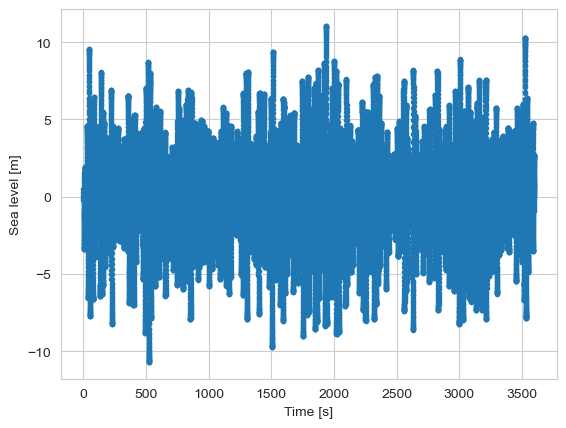

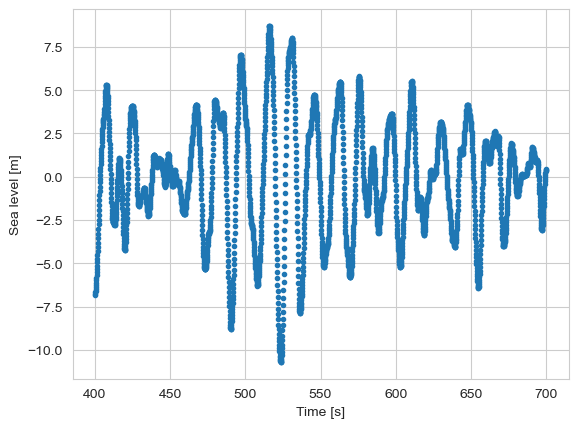

In [44]:
# We plot the sea level as a function of the time
fig, ax = plt.subplots()

ax.plot(t,seaSurface,'.')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Sea level [m]')

#This looks a bit messy!

# Let's consider a small time window of 5 minutes = 300 s.
fig, ax = plt.subplots()

ax.plot(t[(t>400) & (t<700)], seaSurface[(t>400) & (t<700)],'.')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Sea level [m]')


We see that the system is subject to rather strong moments. We also see that it is useful to slice an array to a specific time window.

It may also later become useful to normalize two arrays to make it easier to compare them. Therefore, we define the following two functions:

In [45]:
def sliceArray(array, t, mintime, maxtime):
    # To slice in time we select only datapoints satisfying the greater than 
    # and smaller than requirements.
    slicedArray = array[(t>mintime) & (t<= maxtime)]
    return slicedArray

def normalizeArray(array):
    # To normalize an array, we subtract the minimum value 
    # and divide by the maximum value
    normalizedArray = (array-min(array))/max(array-min(array))
    return normalizedArray

In [46]:
# the maximum and minimum sea surface offset max_sso

max_sso = np.max(seaSurface)
min_sso = np.min(seaSurface)

# corresponding times for max/min sso

max_sst = t[np.argmax(seaSurface)]
min_sst = t[np.argmin(seaSurface)]

time_difference = max_sst-min_sst

# wind speed converted from m/s to km/h

wind_speed_kmh = windSpeed*3.6

max_wind_speed_kmh = np.max(wind_speed_kmh)

max_tower_moment = np.max(towerMom)
min_tower_moment = np.min(towerMom)

print("Maximum sea surface offset:", max_sso, "m")
print("Minimum sea surface offset:", min_sso, "m")
print("Time difference between maximum and minimum sea surface offset events:", time_difference, "s")
print("Maximum wind speed:", max_wind_speed_kmh, "km/h")
print("Maximum tower moment:", max_tower_moment, "kN m")
print("Minimum tower moment:", min_tower_moment, "kN m")


Maximum sea surface offset: 11.05 m
Minimum sea surface offset: -10.69 m
Time difference between maximum and minimum sea surface offset events: 1411.5 s
Maximum wind speed: 253.116 km/h
Maximum tower moment: -1645.26 kN m
Minimum tower moment: -1327809.46 kN m


- Sign of the tower moment indicates the direction of the torque exerted on tower.
positive moment indicates that the torques is in one direction, while negative indicates torque in the opposite direction. Sign matters because it determines the rotational direction of the tower, which affects/might affect stability and the performance.


2. Normalize and compare the different datasets to each other by plotting them together for a time window of your choice. It can be useful to separate the different plots with an offset as here:

```
plt.plot(t,windSpeedNorm+0)
plt.plot(t,seaSurfaceNorm+1)
```

Does any of the datasets seem completely uncorrelated with the others? 

We observe that the acceleration of the nacelle and the tower moment are correlated. Why do you think this is the case? How do you think it scales? 
    

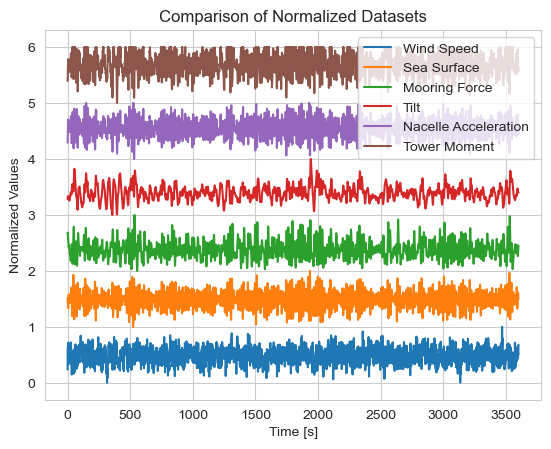

In [47]:
# Your solution here

# Normalize each dataset

windSpeedNorm = normalizeArray(windSpeed)
seaSurfaceNorm = normalizeArray(seaSurface)
mooringNorm = normalizeArray(mooring)
tiltNorm = normalizeArray(tilt)
nacAccNorm = normalizeArray(nacAcc)
towerMomNorm = normalizeArray(towerMom)

# Plot the normalized datasets with appropriate offsets
plt.plot(t, windSpeedNorm + 0, label='Wind Speed')
plt.plot(t, seaSurfaceNorm + 1, label='Sea Surface')
plt.plot(t, mooringNorm + 2, label='Mooring Force')
plt.plot(t, tiltNorm + 3, label='Tilt')
plt.plot(t, nacAccNorm + 4, label='Nacelle Acceleration')
plt.plot(t, towerMomNorm + 5, label='Tower Moment')

plt.xlabel('Time [s]')
plt.ylabel('Normalized Values')
plt.title('Comparison of Normalized Datasets')
plt.legend()
plt.show()


not necessiraly with "others" but sea surface has nothing to do with wind speed or mooring force or nacalle acceleration even though sea surface is related to waves which could relatively affect the tower moment and mooring force.

In [48]:
# This is the same function, but extended to also take into account a situation where no local minimum is present




3. We will test whether the datasets are correlated by calculating the correlation between them. 

    The correlation between two parameters can be estimated with the correlation coefficient, which depends on the covariance. 
    The covariance is defined as
    
    \begin{align}
    \mathrm{cov}(X_1, X_2) = \left\langle(X_1-\langle X_1 \rangle) \cdot ( X_2-\langle X_2 \rangle )\right\rangle
    \end{align}
    
    where we use $\langle \cdots \rangle$ as the expectation value, such that $\langle X_1 \rangle$ is the mean of the variable $X_1$. Note how the covariance resembles to the variance $\mathrm{var}(X_1) = \left\langle(X_1-\langle X_1 \rangle)^2 \right\rangle$.
    
    The covariance between $X_1$ and $X_2$ describes to how large a degree the variation of $X_1$ and $X_2$ is related. To compare covariances it is sensible to normalize with the variances of the two parameters. This gives us the correlation coefficient, which is defined as 
        
    \begin{align}
    \mathrm{corr}(X_1, X_2) = \frac{\left\langle(X_1-\langle X_1 \rangle) \cdot ( X_2-\langle X_2 \rangle )\right\rangle}{\sqrt{\mathrm{var}(X_1)}\cdot \sqrt{\mathrm{var}(X_2)}}
    \end{align}
    
    A correlation parameter close to 1 means that the variation of $X_1$ and $X_2$ is strongly correlated. A value close to zero means that the parameters are not varying together. A value close to -1 means that they are anti-correlated: If one goes up, the other one goes down, so to say.

    Calculate the correlation parameter and find
    - the parameters which are most and least related to the sea surface level.
    - the parameters which are most and least related to tower moment.
    

In [49]:
# Your solution here

'''  I would like to use np library but i am not sure if we are allowed to do so
i will do it in basic way'''

def mean(arr):
    return sum(arr)/len(arr)

def variance(arr):
    mean_val=mean(arr)
    return sum((x-mean_val)**2 for x in arr)/len(arr)

def covariance(x,y):
    mean_x=mean(x)
    mean_y=mean(y)
    return sum((x[i]-mean_x)*(y[i]-mean_y) for i in range(len(x)))/len(x)

def correlation_coefficient(x,y):
    cov=covariance(x,y)
    var_x=variance(x)
    var_y=variance(y)
    corr_coef= cov/(var_x**0.5*var_y**0.5)
    return corr_coef

# calculate the correlation coefficients for all pairs of datasets

corr_coeff_sea_surface = correlation_coefficient(seaSurface, seaSurface)
corr_coeff_wind_speed = correlation_coefficient(seaSurface, windSpeed)
corr_coeff_mooring = correlation_coefficient(seaSurface, mooring)
corr_coeff_tilt = correlation_coefficient(seaSurface, tilt)
corr_coeff_nac_acc = correlation_coefficient(seaSurface, nacAcc)
corr_coeff_tower_mom = correlation_coefficient(seaSurface, towerMom)

# most and least related to sea surface
most_related_to_sea_surface = max([corr_coeff_wind_speed, corr_coeff_mooring, corr_coeff_tilt, corr_coeff_nac_acc, corr_coeff_tower_mom])
least_related_to_sea_surface = min([corr_coeff_wind_speed, corr_coeff_mooring, corr_coeff_tilt, corr_coeff_nac_acc, corr_coeff_tower_mom])


print("Correlation coefficient with Sea Surface Level:")
print("- Wind Speed:", corr_coeff_wind_speed)
print("- Mooring Force:", corr_coeff_mooring)
print("- Tilt:", corr_coeff_tilt)
print("- Nacelle Acceleration:", corr_coeff_nac_acc)
print("- Tower Moment:", corr_coeff_tower_mom)

print("\nParameters most related to Sea Surface Level:")
print("- Most Related:", most_related_to_sea_surface)
print("- Least Related:", least_related_to_sea_surface)


Correlation coefficient with Sea Surface Level:
- Wind Speed: 0.02581689806421368
- Mooring Force: 0.1346519824747326
- Tilt: -0.3961419648815355
- Nacelle Acceleration: -0.6212418534160928
- Tower Moment: -0.538509185475399

Parameters most related to Sea Surface Level:
- Most Related: 0.1346519824747326
- Least Related: -0.6212418534160928


4. In exercise 1 we found the minima and maxima of the sea height and we investigated how far apart the deepest through and the highest peak were.
    In stability analysis the maximal values are not always of immediate interest, because these values may only appear very far apart in time. Instead it may be more interesting to consider how many small cycles some parameter performs. 

- For the mooring force, find all the local minima and maxima for the mooring force time series between t = 0 s and t = 2000 s. You will see methods for doing this in the lecture review.
- Make a histogram of the difference in force between each minima and maxima. Remember to do this on both sides of a peak. The figures below show the first four differences to calculate for the interval from 400 s to 700 s, and a histogram with 10 bins of the forces. Use the histogram to check your method and create a histogram for the mooring force time series between t = 0 s and t = 2000 s.
- Compare the histogram with the difference between the global maximum and global minimum and comment.



<img src="figs/mooringForceMaxMinHistogram.png" width=800px/>



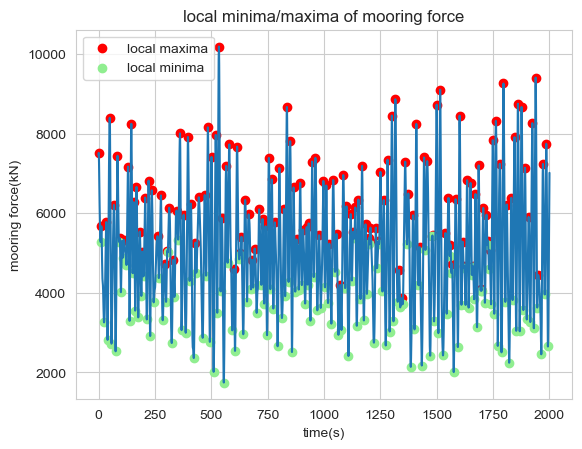

In [50]:
# Your solution here

start_time=0
end_time=2000

indices=np.where((t>start_time)&(t<=end_time))[0]

mooring_force=mooring[indices]

extrema=np.diff(np.sign(np.diff(mooring_force)))
                
maxima_indices=np.where(extrema==-2)[0]+1
minima_indices=np.where(extrema==2)[0]+1
                
maxs_x=t[indices][maxima_indices]
maxs_y=mooring_force[maxima_indices]
mins_x=t[indices][minima_indices]
mins_y=mooring_force[minima_indices]
                
fig, ax= plt.subplots()
                
ax.plot(t[indices], mooring_force)
ax.scatter(maxs_x, maxs_y, marker='o', color='red', label='local maxima')
ax.scatter(mins_x, mins_y, marker='o', color='lightgreen', label='local minima')
ax.legend()
ax.set_title('local minima/maxima of mooring force')
ax.set_xlabel('time(s)')
_ = ax.set_ylabel('mooring force(kN)')

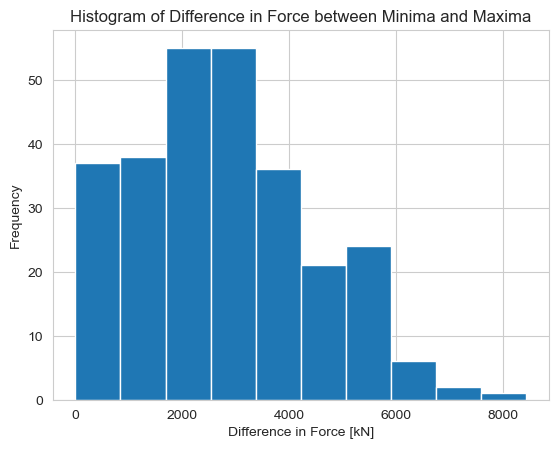

In [51]:
min_max_differences = [abs(max_y - min_y) for max_y, min_y in zip(maxs_y, mins_y)]

max_min_differences = [abs(min_y - max_y) for max_y, min_y in zip(maxs_y[:-1], mins_y[1:])]

all_differences = min_max_differences + max_min_differences

plt.hist(all_differences, bins=10)
plt.xlabel('Difference in Force [kN]')
plt.ylabel('Frequency')
plt.title('Histogram of Difference in Force between Minima and Maxima')
plt.show()

5. We would like to dimension the tower on the basis of the maximum tower bottom moment. 
    The tower is a hollow steel cylinder with an outer diameter of 10 m and a wall thickness T. 

    The bending stress in a hollow cylinder is
    \begin{align}
    s = \frac{M_b}{W}
    \end{align}
    where $s$ is the stress, $M_b$ is the maximum bending moment, and $W$ is the moment of resistance. 
    The bending stress needs to be lower than the maximum allowable stress. For the common steel type, FE 510, the maximum allowable stress is 345 MPa. 

    The moment of resistance for a hollow cylinder is
    \begin{align}
    W = \frac{\pi}{64}\frac{D_o^4 – D_i^4}{D_o}
    \end{align}
    where $D_o$ is the outer diameter and $D_i$ is the inner diameter. 

    Write a function that returns the minimum allowable wall thickness T of the tower for a given maximum tower moment and calculate for the maximum tower moment recorded during the one hour simulation period.
    Does the result surprise you?
    

In [99]:
# Your solution here

def min_T(max_tower_moment, outer_diameter, inner_diameter, max_allowable_stress):
  
    d_o=outer_diameter
    d_i=inner_diameter
    
    allowable_stress=max_allowable_stress
    
    W=(np.pi/64)*((d_o**4)-(d_i**4))/d_o
    
    bending_stress=max_tower_moment / W
    
    # after rearranging the equation and solving for T we get
    T=(np.abs((d_o**4)-((d_o-(64/bending_stress/np.pi))**4)))**(0.25)-d_o
    
    return T

max_tower_moment = max(towerMom)
outer_diameter=10
inner_diameter=9  # we put asked value for d_i
max_allowable_stress=345

cal_min_T=min_T(max_tower_moment, outer_diameter, inner_diameter, max_allowable_stress)
print("minimum allowable wall thickness of tower:", cal_min_T, "meters")

# the result indeed surprised me 
# i am pretty sure it will surprise you as well haha
# i couldn't really find where did i made the mistake because i wasn't
# expecting the - value

minimum allowable wall thickness of tower: -4.5804585636903274 meters
